# Crypto-currency Trade-in Analysis 

Crypto-currency such as Bitcoin are unpredictable and most of the increases and decreases in prices happenning second by second is just noise, there must be some influence for the substantial changes in price. Even though it is difficult to quanitifiably predict the price of Bitcoin (and other alt-coins) however, instinctly we know when it is a good or bad time to sell or buy any form of goods or currency.

This analysis is to identify when to trade or buy crytocurrencies and predicting when to either buy or trade. The dataset describes the price of crypto-currencies, volume and market captalisation on a daily basis from 1/1/2016 to 10/1/2020. The data can be found on [Kaggle](https://www.kaggle.com/georgezakharov/historical-data-on-the-trading-of-cryptocurrencies).

In [139]:
# Python Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

path = 'C:\\Users\\Jamie\\Desktop\\NN_Project\\Other projects'

In [131]:
# Filter crypto data
file_loc = path + '\\Datasets\\crypto_tradinds.csv' # File location
file = pd.read_csv(file_loc)
file['trade_date'] = pd.to_datetime(file['trade_date'])
mask = (file['trade_date'] >= "2016-1-1") & (file['trade_date'] <= "2020-1-10") & (file['trade_date'] == "2016-1-1")
c = pd.DataFrame(file.loc[mask])
filter_types = pd.Series(list(c['crypto_name']))
types = long_types[pd.notna(long_types)]
data_filt = pd.DataFrame(file[file['crypto_name'].isin(types)])
data_filt = data_filt.set_index(data_filt['trade_date'])
data_filt.head() # Data that has the same range as bitcoin

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
trade_date,,,,,,,,,,,,,,,,,
2016-01-01,2016-01-01,36278900.0,434.33,1.0,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2016-01-02,2016-01-02,30096600.0,433.44,1.0,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2016-01-03,2016-01-03,39633800.0,430.01,1.0,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2016-01-04,2016-01-04,38477500.0,433.09,1.0,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)
2016-01-05,2016-01-05,34522600.0,431.96,1.0,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,NaN,Proof of Work (PoW)


To identify the contribution of the ups and downs of bitcoin we need to explore diverse trends of unique variables. The analysis of the variables can range from both inside or outside the dataset inorder to gain a broad understanding of volatility of crypto-currencies.

The plots below show the trends of different crypto-currency prices (in USD) over time and as evidient there are individually influenced by unknown factors. However, the other [notable](https://en.wikipedia.org/wiki/List_of_cryptocurrencies) crypto-currencies such as Ethereum and XRP (Ripple) follows a similar trend to Bitcoin which could have similar varaible/s relating to the spike in price. 

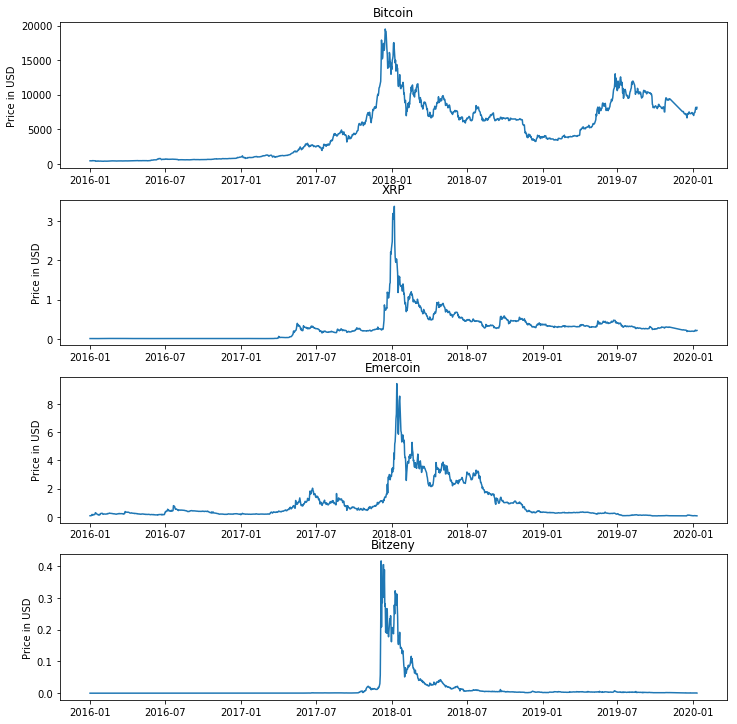

In [140]:
lgth_typ = len(types)
curr = [0, 2, 20, 100]

fig, ax = plt.subplots(len(curr),1, figsize=(10,10))
fig.tight_layout()

# The time is constant (x-axis)
for i in range(len(curr)):  
    ax[i].title.set_text(str(types[curr[i]]))
    ax[i].plot(data_filt[data_filt['crypto_name'] == types[curr[i]]]['price_usd'])
    ax[i].set_ylabel('Price in USD')
    ax[i].autoscale_view()


One variable to analyse and compare is the amount the internet search terms that are relate to crypto-currencies. In this instance, the term "Bitcoin" is used to analysis if there is a correlation between the spikes of bitcoin.  

In [204]:
# Bitcoin Google searches
word_searches = path + "\\Data Analysis\\1. Crypto_trade-in\\multiTimeline.csv"
words = pd.read_csv(word_searches)
words.Week = pd.to_datetime(words.Week)
words = words.set_index('Week')
# Concatenated internet search and price of bitcoin
max_unit_word = words['Bitcoin: (Worldwide)'].max()
max_unit_coin = data_filt[data_filt['crypto_name'] == types[0]]['price_usd'].max()
normal_word = words['Bitcoin: (Worldwide)']/(max_unit_word/100)
normal_bit = data_filt[data_filt['crypto_name'] == types[0]]['price_usd']/(max_unit_coin/100)
norm = pd.concat([normal_bit, normal_word], axis=1, join='inner')
norm = norm.rename(columns={'price_usd':'Bitcoin_price', "Bitcoin: (Worldwide)":"Bitcoin_Search"})
norm.head()

,Bitcoin_price,Bitcoin_Search
2016-01-05,2.215475,4.0
2016-01-17,1.960774,3.0
2016-01-24,2.066788,3.0
2016-01-31,1.891380,2.0
2016-02-10,1.957440,3.0


The trend below depicts the number of Bitcoin searches from [Google.com](https://trends.google.com/trends/?geo=US). As evident between 2017-01 and 2017-07 there is a big spike of the amount of searches that were made. This could suggest that at the time crypto-currencies were not well known in the world (until 2017-01) where many companies and enthusiasts began to take interest in it. The more demand for the currency, the increase in price of the crypto-currency. 

Also, evident the amount of 'Bitcoin' search spikes present between 2017 and 2018 it roughly depicts the popularity of the currency during its peak. It is certain the quantitative popularity does not definitive dictate the rise or fall of prices in Bitcoin. What this data set grants is the inital and continuous popularity of the crypto-currency and how these interests from the world wide web influence the price of bitcoin. 

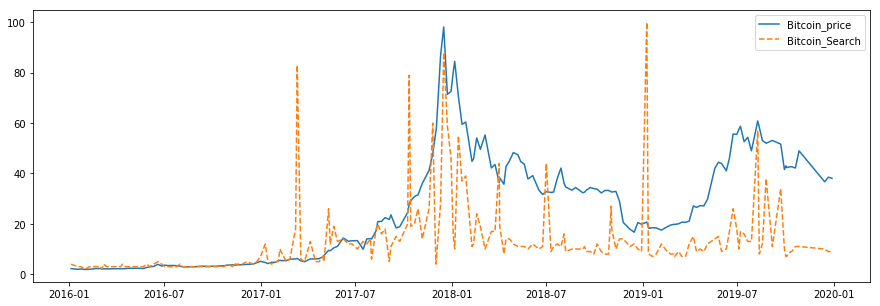

In [203]:
# normalised data
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(norm['Bitcoin_price'])
ax.plot(norm['Bitcoin_Search'], linestyle='dashed')
ax.legend()

In the previous analysis, it showed the interest of bitcoin via Google searches depict a rough positive weak trend to the influence of price. Another factor can be social media platforms such as Twitter, Facebook, Instagram and others more, grants an insight to worldly concerns and trends as well as commnicating with people from around the world. Through this connected world social media could impact the spike in prices.